In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [34]:
import os
for dirname, _, filenames in os.walk('"C:/Users/Vaishali/Downloads/SMSSpamCollection"'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_table("C:/Users/Vaishali/Downloads/SMSSpamCollection",names=['label','sms_message'])

# Printing out first five columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
spam_count=df[df["label"]=="spam"].shape[0]
ham_count=df[df["label"]=="ham"].shape[0]

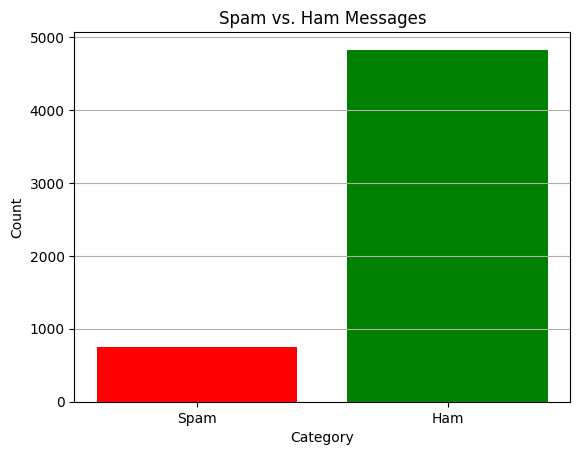

In [36]:
plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['red', 'green'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs. Ham Messages')
plt.grid(axis='y')


In [37]:
df['label'] = df.label.map({'ham':0, 'spam':1})
df.head()


,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# Size of the dataset
df.shape

(5572, 2)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [40]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [41]:
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset
X_resampled, y_resampled = oversampler.fit_resample(training_data,y_train)


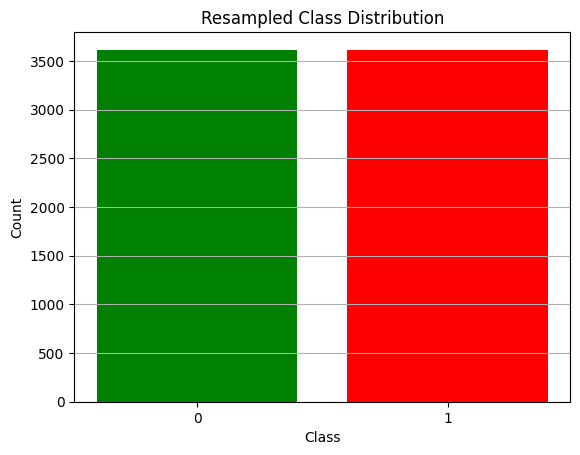

In [42]:


# Calculate counts of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot
plt.bar(unique_classes, class_counts, color=['green', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Resampled Class Distribution')
plt.xticks(unique_classes)  # Set x-axis ticks to unique class values
plt.grid(axis='y')

# Show plot
plt.show()

In [43]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_resampled, y_resampled)
predictions = naive_bayes.predict(testing_data)

In [44]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
y_test

Accuracy score:  0.9820531227566404
Precision score:  0.9166666666666666
Recall score:  0.9513513513513514
F1 score:  0.9336870026525199


1078    0
4028    0
958     0
4642    0
4674    0
       ..
3207    0
4655    0
1140    0
1793    1
1710    0
Name: label, Length: 1393, dtype: int64

In [45]:
# Print the actual labels and predicted labels side by side
for actual_label, predicted_label in zip(y_test, predictions):
    print("Actual Label:", actual_label, "| Predicted Label:", predicted_label)

Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 1 | Predicted Label: 1
Actual Label: 0 | Predicted Label: 0
Actual Label: 1 | Predicted Label: 1
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
Actual Label: 0 | Predicted Label: 0
A

In [46]:
# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9]  # Number of neighbors to consider
    }

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(training_data, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to create and train the KNN classifier
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_resampled, y_resampled)

# Predict using the best KNN classifier
predicted_label = best_knn_classifier.predict(testing_data)

print('Accuracy score: ', format(accuracy_score(y_test, predicted_label)))
print('Precision score: ', format(precision_score(y_test, predicted_label)))
print('Recall score: ', format(recall_score(y_test, predicted_label)))
print('F1 score: ', format(f1_score(y_test, predicted_label)))    


Best Hyperparameters: {'n_neighbors': 3}
Accuracy score:  0.9511844938980617
Precision score:  1.0
Recall score:  0.6324324324324324
F1 score:  0.7748344370860927


In [47]:
# Assuming 'unseen_message' is your new, unseen text data
unseen_message = "Congrats!!!you won a lottery."

# Transform the unseen message using the already fitted CountVectorizer
transformed_unseen_message = count_vector.transform([unseen_message])

# Now 'transformed_unseen_message' is ready to be used with your model for prediction
# For example, if you have a model named 'model', you can predict like this:
prediction = naive_bayes.predict(transformed_unseen_message)
# And interpret the prediction as needed
predicted_class = 'spam' if prediction[0] == 1 else 'not spam'
print(f"The message is predicted to be: {predicted_class}")


The message is predicted to be: spam


In [48]:
# unseen data knn classification
unseen_message = "Shortlisted for interview."

# Transform the unseen message using the already fitted CountVectorizer
transformed_unseen_message = count_vector.transform([unseen_message])

# Now 'transformed_unseen_message' is ready to be used with your model for prediction
# For example, if you have a model named 'model', you can predict like this:
prediction = best_knn_classifier.predict(transformed_unseen_message)

# And interpret the prediction as needed
predicted_class = 'spam' if prediction[0] == 1 else 'not spam'
print(f"The message is predicted to be: {predicted_class}")

The message is predicted to be: not spam
